In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# Checking data types
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# Information about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


.info() shows that there are total 3276 rows from indexing 0 to 3275. Above information shows that columns like ph, Sulfate and Trihalomethanes are missing data.


In [6]:
# Checking shape of the data
df.shape

(3276, 10)

In [8]:
# Checking correlation
correlation = df.corr().style.background_gradient(cmap = 'YlGnBu')
correlation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

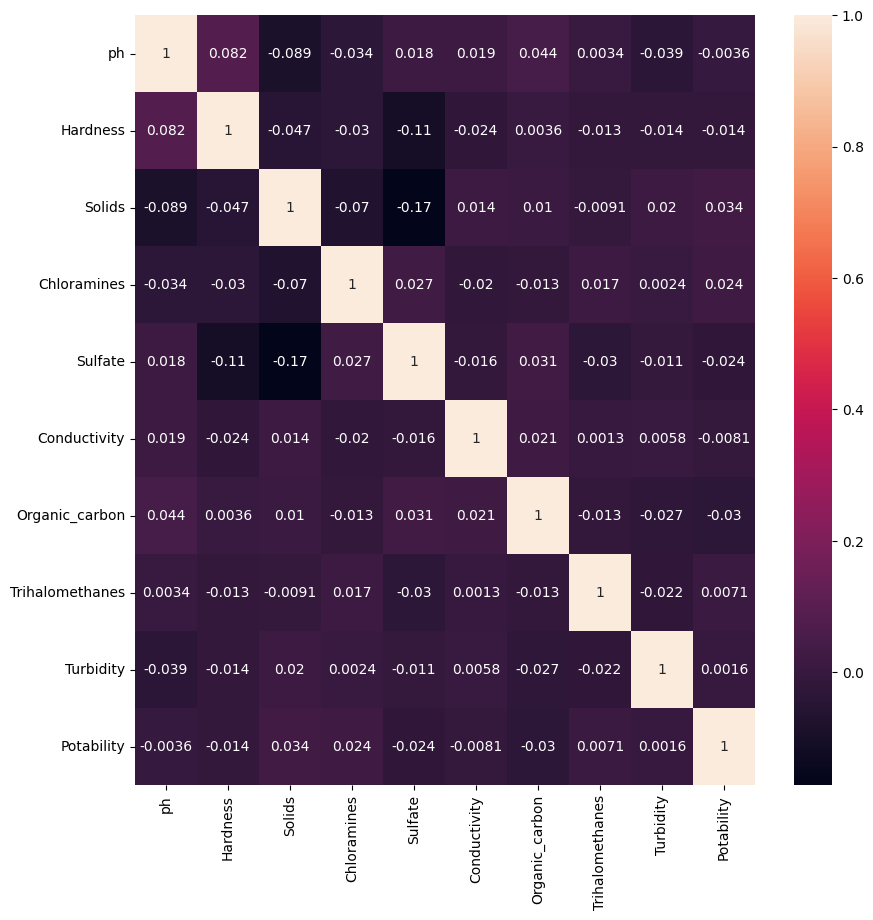

In [9]:
# heatmap of correlation

fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

It shows that there are no multicollinearty.

# Check unique item in Potability

In [10]:
df['Potability'].unique()

array([0, 1])

There are two unique values in potability column. 0 means bad water and 1 means good.


In [11]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [12]:
df['Potability'].replace(0, 'Impure water', inplace = True)
df['Potability'].replace(1,'Pure water', inplace = True)

<Axes: xlabel='Potability', ylabel='count'>

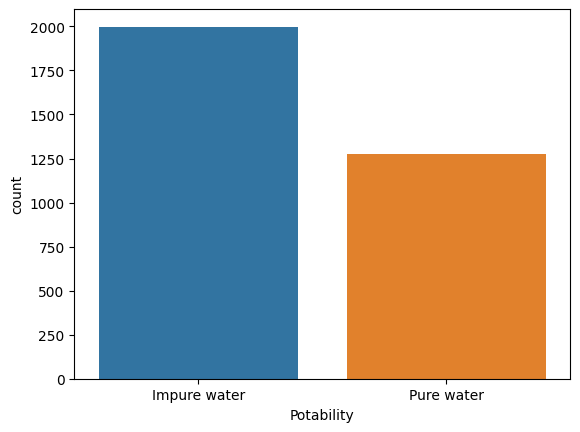

In [13]:
# Pure or impure water on count plot

sns.countplot(x = 'Potability', data = df)

In [14]:
df['Potability'].replace('Impure water',0, inplace = True)
df['Potability'].replace('Pure water',1, inplace = True)

# Handle missing data

Checking missing data

In [15]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Box plot of ph column to check outliers

<Axes: >

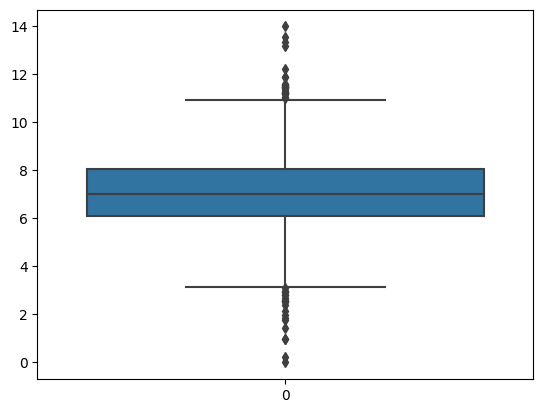

In [16]:
sns.boxplot(data=df['ph'])

Box plot of Sulfate column to check outliers.

<Axes: >

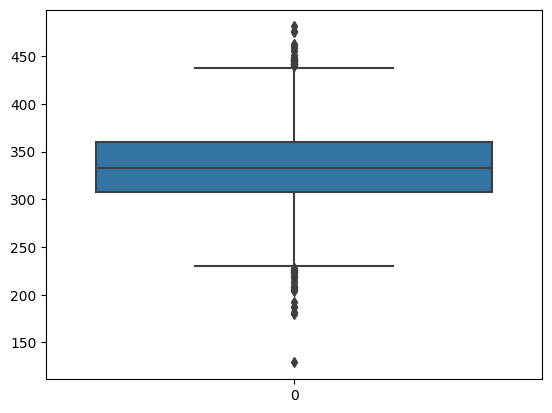

In [17]:
sns.boxplot(data = df.Sulfate)

Box plot of Trihalomethanes to check outliers.

<Axes: >

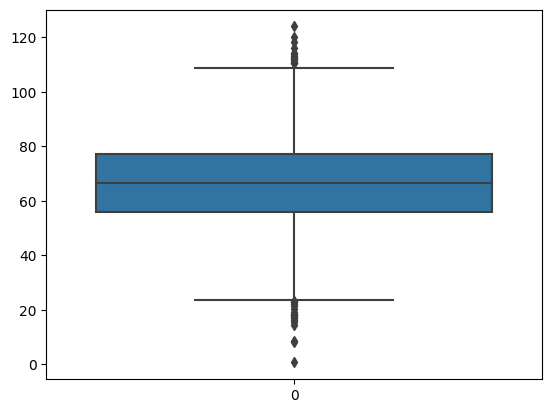

In [18]:
sns.boxplot(data = df.Trihalomethanes)

It shows ph, Sulfate and Trihalomethanes has outliers so we use mean to fill missing data.

# Filling missing data with mean value

In [19]:
df['ph'] = df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [20]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [21]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

After handling missing data there are no null values in dataset columns.

# Feature Selection

In [22]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.Potability

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# Making model

In [23]:
# Logistic Regression algorithm

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 40)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.600609756097561

In [27]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [26]:
# Support Vector Classifier

from sklearn.svm import SVC
model_svc = SVC(random_state = 40)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

# Evaluation

In [28]:
from sklearn.metrics import (accuracy_score, classification_report, f1_score)

# Accuracy Score for every module

ac = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f'Accuracy score for Logistic Regression is  {ac} i.e. {round(ac*100)} %')

ac_rfc = accuracy_score(y_test,y_pred_rfc)
print(f'Accuracy score for Random Forest Classifier is {ac_rfc} i.e. {round(ac_rfc*100)}%')

ac_svc = accuracy_score(y_test,y_pred_svc)
print(f'Accuracy score for Support Vector Classifier is {ac_svc} i.e. {round(ac_svc*100)}%')

Accuracy score for Logistic Regression is  0.600609756097561 i.e. 60 %
Accuracy score for Random Forest Classifier is 0.7896341463414634 i.e. 79%
Accuracy score for Support Vector Classifier is 0.600609756097561 i.e. 60%


In [35]:
# F1_score for every module

f1_l = f1_score(y_test, y_pred)
print(f'f1_score for Logistic Regression is {f1_l} i.e. {round(f1_l*100)}%')

f1_rfc = f1_score(y_test, y_pred_rfc)
print(f'f1_score for Random Forest Classifier is {f1_rfc} i.e. {round(f1_rfc*100)}%')

f_svc = accuracy_score(y_test,y_pred_svc)
print(f'Accuracy score for Random Forest Classifier is {f_svc} i.e. {round(f_svc*100)}%')


f1_score for Logistic Regression is 0.0 i.e. 0%
f1_score for Random Forest Classifier is 0.7125 i.e. 71%
Accuracy score for Random Forest Classifier is 0.600609756097561 i.e. 60%


In [30]:
# Classification report for Logistic Rregression

classify = classification_report(y_true = y_test, y_pred = y_pred)
print(classify)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       395
           1       0.00      0.00      0.00       261

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656



<p> precision for impure water is 0.63 <br>
recall for impure water is  0.87 <br>
f1-score is 0.73 </p>

<p> precision for impure water is 0.52 <br>
recall for impure water is 0.21 <br>
f1-score is 0.30 </p>

Accuracy is 61% in Logistic Regression.

In [31]:
# Classification report for RandomForestClassifier

classify = classification_report(y_true = y_test, y_pred = y_pred_rfc)
print(classify)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       395
           1       0.78      0.66      0.71       261

    accuracy                           0.79       656
   macro avg       0.79      0.77      0.77       656
weighted avg       0.79      0.79      0.79       656



<p> precision for impure water is 79 <br>
recall for impure water is  0.88 <br>
f1-score is 0.82  </p>

<p> precision for impure water is 0.78 <br>
recall for impure water is 0.66 <br>
f1-score is 0.71 </p>

Accuracy is 79% in Random Forest Classifier.

In [32]:
# Classification report of SVC

classify = classification_report(y_true = y_test, y_pred = y_pred_svc)
print(classify)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       395
           1       0.00      0.00      0.00       261

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656



In [33]:
Final = pd.DataFrame(
    {
        'Logistic Regression' : [f1_l, ac, round(f1_l*100), round(ac*100)],
        'Random Forest Classifier' : [f1_rfc, ac_rfc, (round(f1_rfc*100)), round(ac_rfc*100)],
        'Support Vector Classifier' : [f1_rfc, ac_rfc, (round(f1_rfc*100)), round(ac_rfc*100)]
    },
    index = ['F1_score', 'Accuracy Score', 'F1_Score in percent', 'Accuracy Score in percent']
)

In [34]:
Final

,Logistic Regression,Random Forest Classifier,Support Vector Classifier
F1_score,0.00000,0.712500,0.712500
Accuracy Score,0.60061,0.789634,0.789634
F1_Score in percent,0.00000,71.000000,71.000000
Accuracy Score in percent,60.00000,79.000000,79.000000
